# EXPLORATORY DATA ANALYSIS

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [4]:
#importing the data
df=pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')

In [5]:
#checking the head of the data
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
#Renaimg the columns.
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"},inplace=True)

In [7]:
#shows the number and types of object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
#to check null value in the data.
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

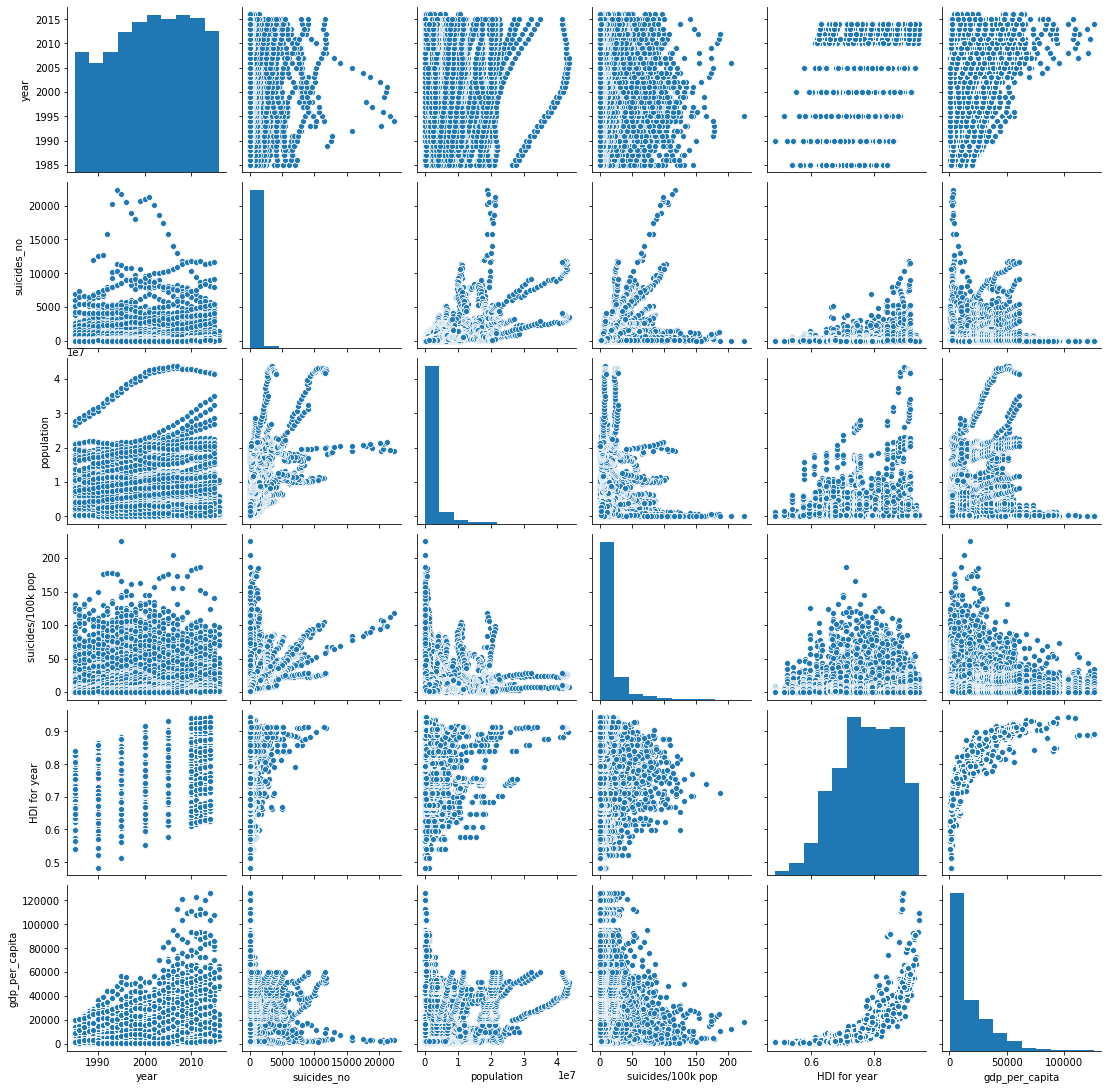

In [10]:
#pairplot using seaborn
import seaborn as sns
sns.pairplot(df)

In [11]:
#correlation matrix
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


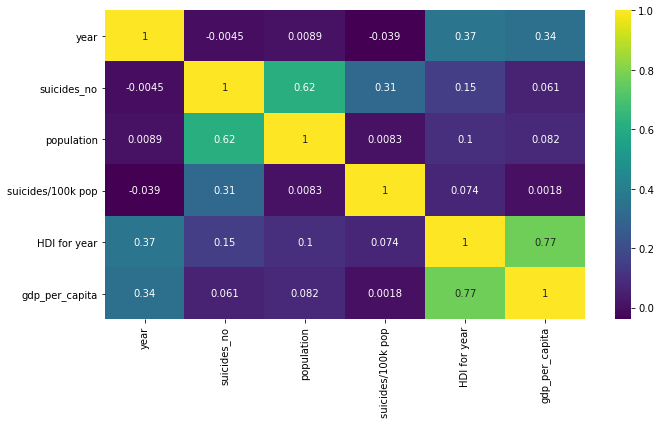

In [13]:
#heatmap of the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.tight_layout()

Text(0.5, 0, 'year')

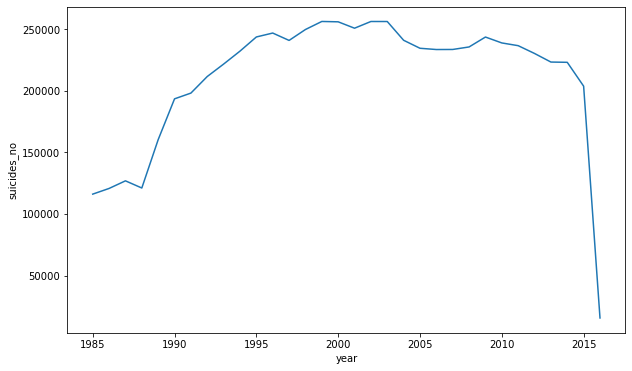

In [23]:
df.groupby('year').sum()['suicides_no'].plot(figsize=(10,6))
plt.ylabel('suicides_no')
plt.xlabel('year')

We can clearly see gradual increase in early and missle years and then decrese in suicide rate in late years.

Text(0.5, 1.0, 'MEAN SUICIDES PER 100K POPULATION OF MALE AND FEMALE ')

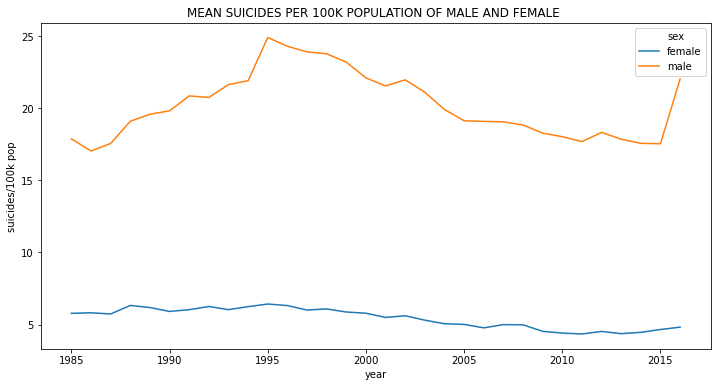

In [24]:
plt.figure(figsize=(12,6))
data=df.groupby(['year','sex']).agg('mean').reset_index()
sns.lineplot(x='year',y='suicides/100k pop',data=data,hue='sex')
plt.xlabel('year')
plt.ylabel('suicides/100k pop')
plt.title('MEAN SUICIDES PER 100K POPULATION OF MALE AND FEMALE ')

Suicide rate in males is much higher than females.

Text(0.5, 1.0, 'Suicide count on the basis of year and sex')

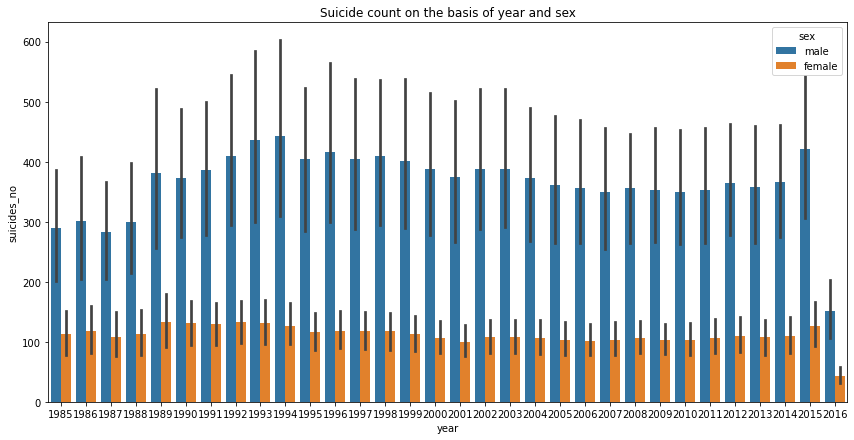

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='year',y='suicides_no',data=df,hue='sex')
plt.tight_layout()
plt.title('Suicide count on the basis of year and sex')

Text(0.5, 1.0, 'Yearwise Suicide count per 100k population ')

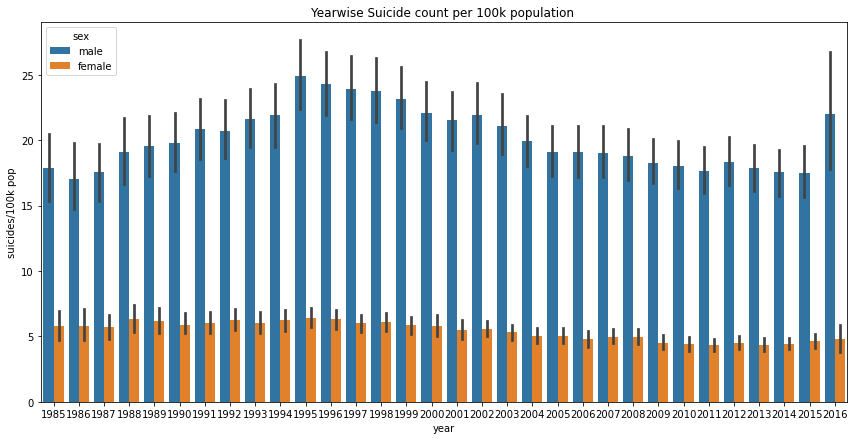

In [16]:
#yearwise suicide count
plt.figure(figsize=(12,6))
sns.barplot(x='year',y='suicides/100k pop',data=df,hue='sex')
plt.tight_layout()
plt.title('Yearwise Suicide count per 100k population ')

In [17]:
df['age'].value_counts()

55-74 years    4642
75+ years      4642
15-24 years    4642
35-54 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [18]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [43]:
df.groupby('age').sum()['suicides_no'].reset_index().sort_values(by='suicides_no',ascending=False)

,age,suicides_no
2,35-54 years,2452141
4,55-74 years,1658443
1,25-34 years,1123912
0,15-24 years,808542
5,75+ years,653118
3,5-14 years,52264


In [40]:
#predifing the orders.
sorder=['5-14 years','15-24 years','25-34 years', '35-54 years', 
       '55-74 years','75+ years']

Text(0.5, 1.0, 'Age-wise suicide count ')

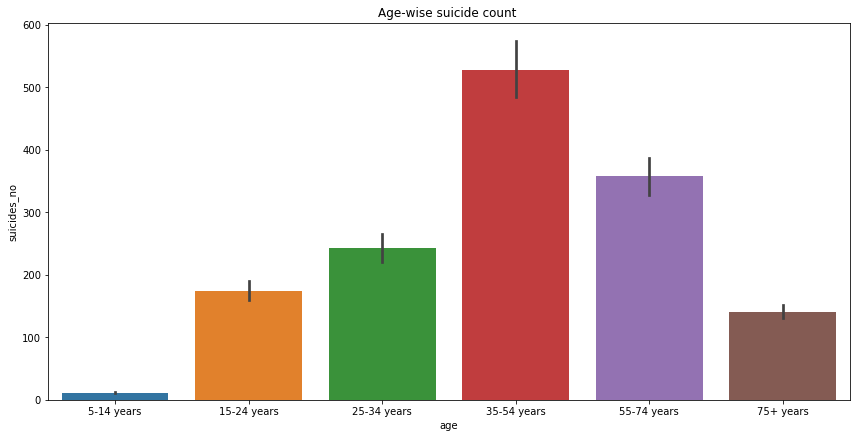

In [21]:
#age-wise suicide count
plt.figure(figsize=(12,6))
sns.barplot(x='age',y='suicides_no',data=df,order=sorder)
plt.tight_layout()
plt.title('Age-wise suicide count ')

age-group having 35-34 years have highest suicide count

Text(0.5, 1.0, 'Age-wise suicide count based on sex')

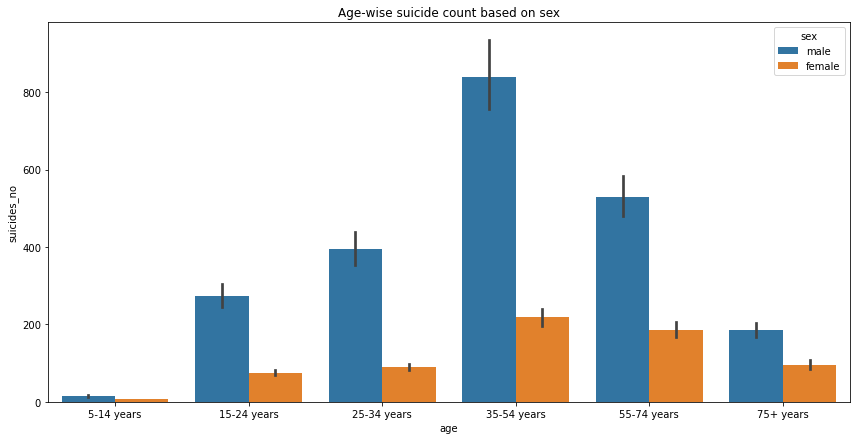

In [22]:
#age-wise suicide count 
plt.figure(figsize=(12,6))
sns.barplot(x='age',y='suicides_no',data=df,order=sorder,hue='sex')
plt.tight_layout()
plt.title('Age-wise suicide count based on sex')

<Figure size 720x432 with 0 Axes>

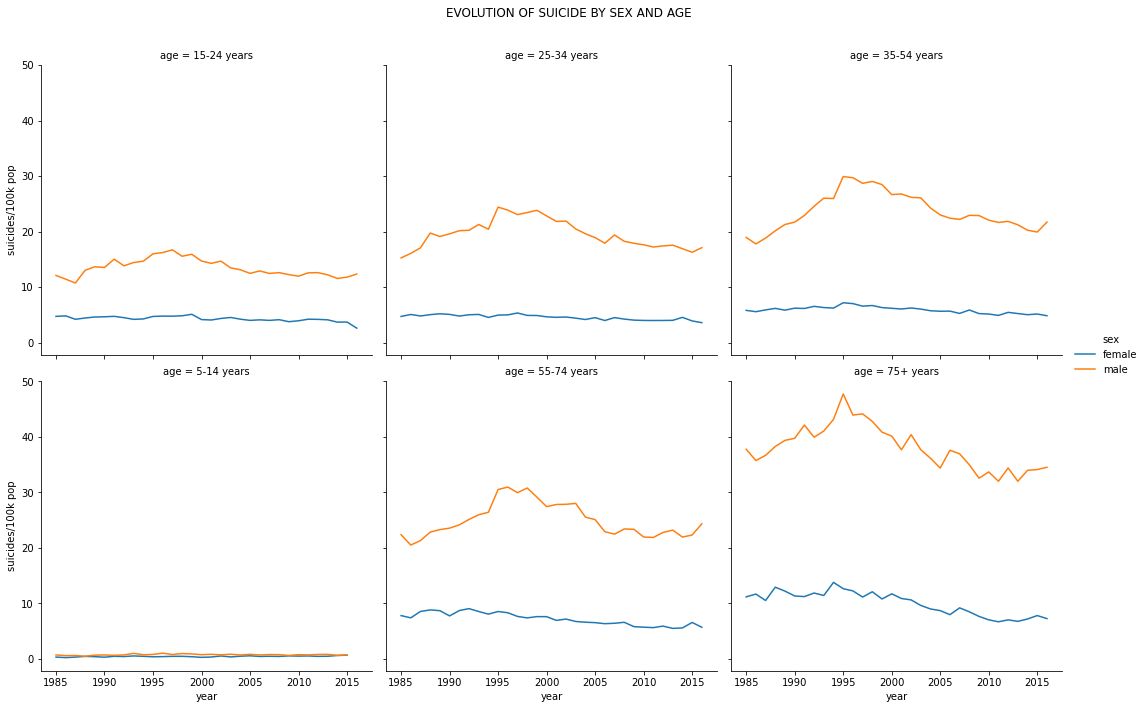

In [25]:
plt.figure(figsize=(10,6))
data=df.groupby(['year','sex','age']).agg('mean').reset_index()
sns.relplot(x='year',y='suicides/100k pop',data=data,hue='sex',col='age',col_wrap=3,kind='line')
plt.suptitle('EVOLUTION OF SUICIDE BY SEX AND AGE')
plt.subplots_adjust(top = 0.9)

In [41]:
#Country-wise suicide count.
df[(df['year'] == 1985)].groupby('country')[['suicides_no']].sum().reset_index().sort_values(by='suicides_no',ascending=False)

,country,suicides_no
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105
22,Italy,4759
8,Brazil,4228
36,Republic of Korea,3689
10,Canada,3258
43,Thailand,2982


USA has the highest suicide count in 1985

In [27]:
df[df['year']==2016].groupby('country')[['suicides_no']].sum().reset_index().sort_values(by='suicides_no',ascending=False)

,country,suicides_no
15,Thailand,4117
13,Romania,1953
11,Netherlands,1886
6,Hungary,1761
4,Czech Republic,1318
1,Austria,1201
14,Sweden,1130
8,Lithuania,822
2,Croatia,683
10,Mongolia,423


Thailand has the highest suicide count in 2016

In [28]:
df.groupby('year').sum()['suicides_no'].reset_index().sort_values(by='suicides_no',ascending=False)

,year,suicides_no
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


* We can see highest suicide in 1999 and lowest in 2016.

In [30]:
df.groupby(['country','year']).sum()['suicides/100k pop'].reset_index().sort_values(by='suicides/100k pop',ascending=False).head(20)

,country,year,suicides/100k pop
1255,Lithuania,1995,639.30
1256,Lithuania,1996,595.61
948,Hungary,1991,575.00
1260,Lithuania,2000,571.80
949,Hungary,1992,570.26
1261,Lithuania,2001,568.98
1752,Russian Federation,1994,567.64
1258,Lithuania,1998,566.36
1257,Lithuania,1997,565.44
1259,Lithuania,1999,561.53


Text(0.5, 1.0, 'Generation-wise suicide count of males and females')

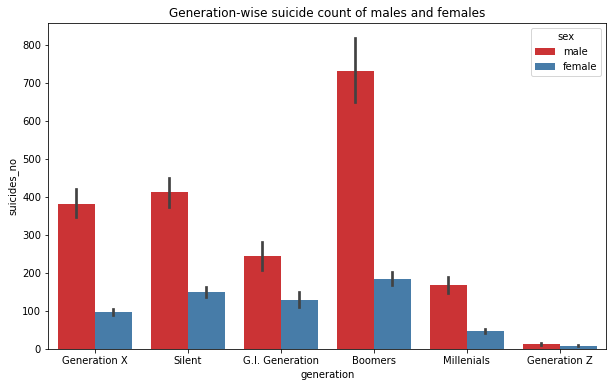

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='generation',y='suicides_no',data=df,hue='sex',palette='Set1')
plt.title('Generation-wise suicide count of males and females')

Gneration 'Boomers' has highest number of suicides

Text(0.5, 1.0, 'Country-wise suicide-count')

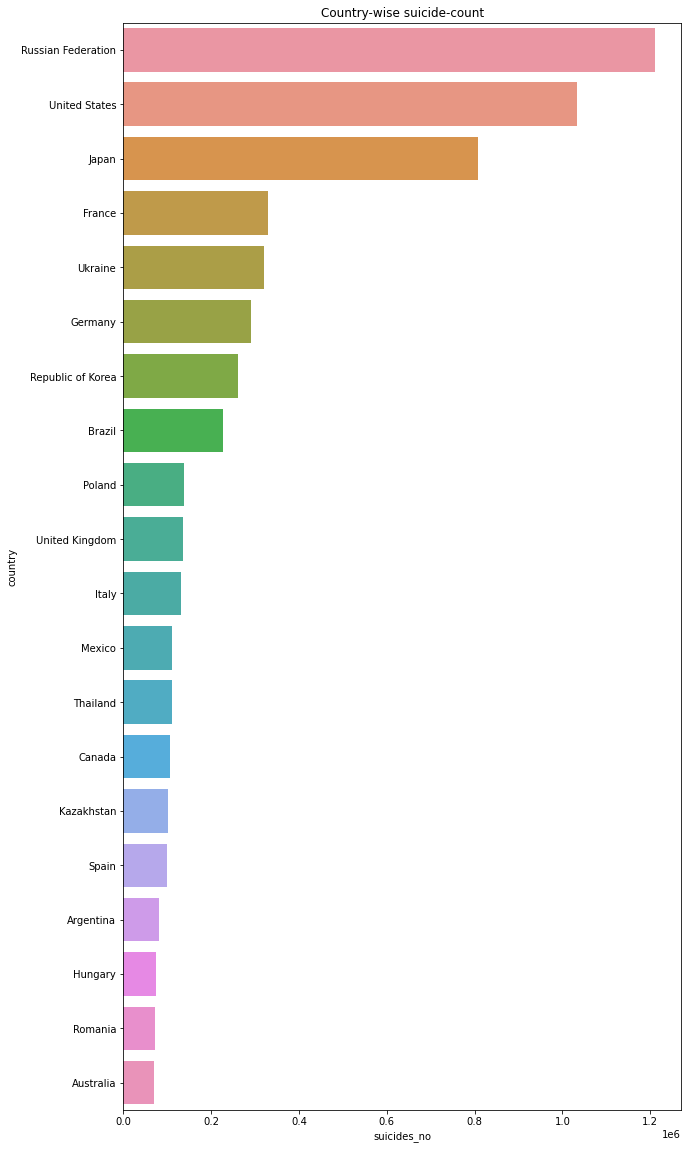

In [45]:
data=df.groupby('country').sum()['suicides_no'].sort_values(ascending=False)
f,ax=plt.subplots(1,1,figsize=(10,20))
ax=sns.barplot(data.head(20),data.head(20).index)
plt.title('Country-wise suicide-count')

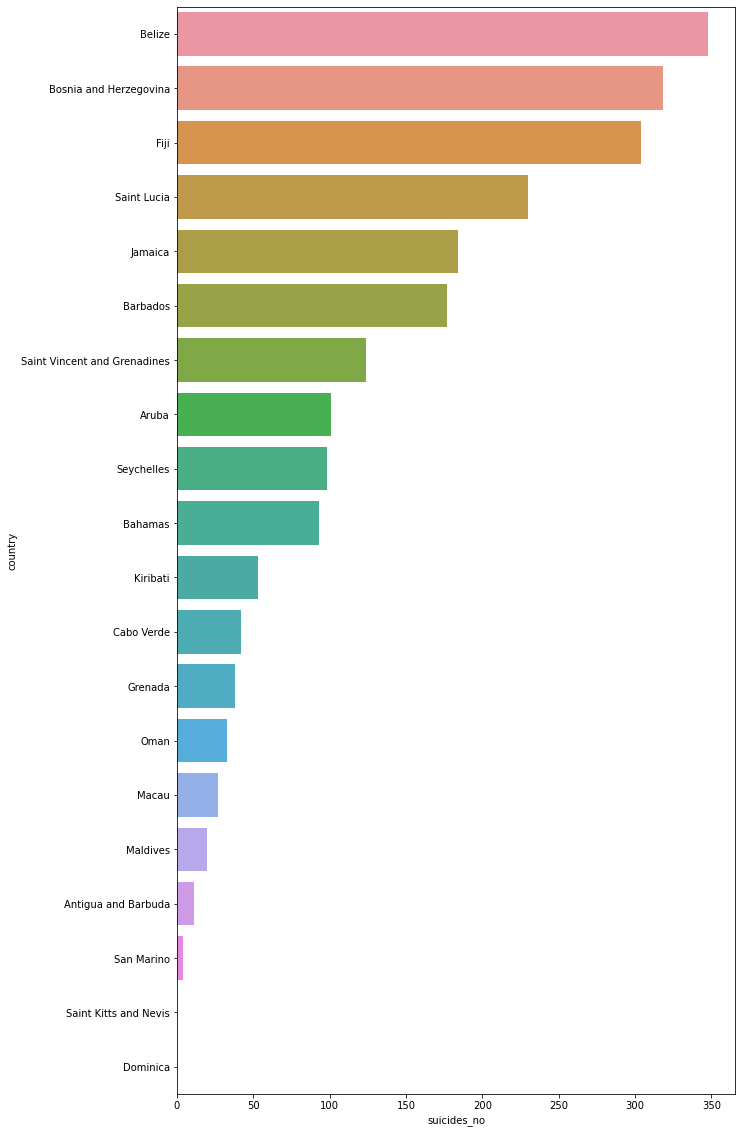

In [33]:
data=df.groupby('country').sum()['suicides_no'].sort_values(ascending=False)
f,ax=plt.subplots(1,1,figsize=(10,20))
ax=sns.barplot(data.tail(20),data.tail(20).index)

# **                             SCATTER PLOTS

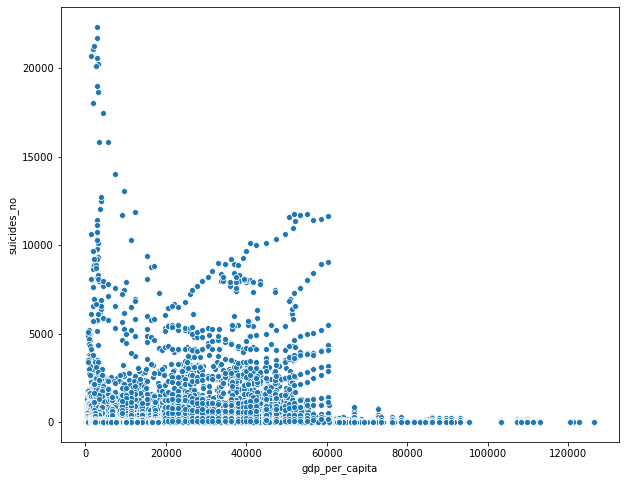

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='gdp_per_capita',y='suicides_no',data=df)

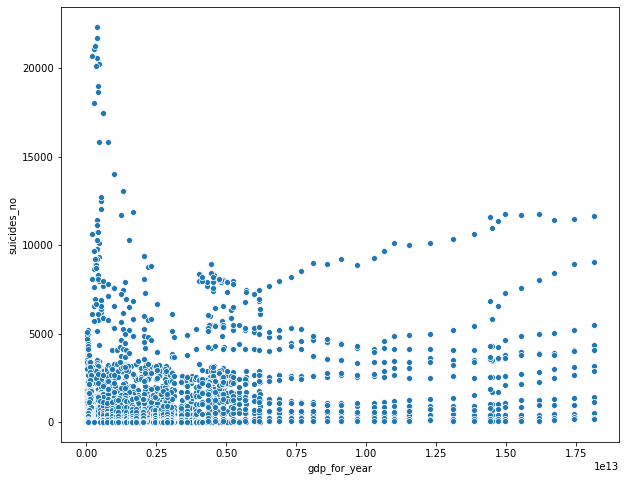

In [36]:
plt.figure(figsize=(10,8))
df['gdp_for_year']=df['gdp_for_year'].str.replace(",","").astype("int64")
sns.scatterplot(x='gdp_for_year',y='suicides_no',data=df)

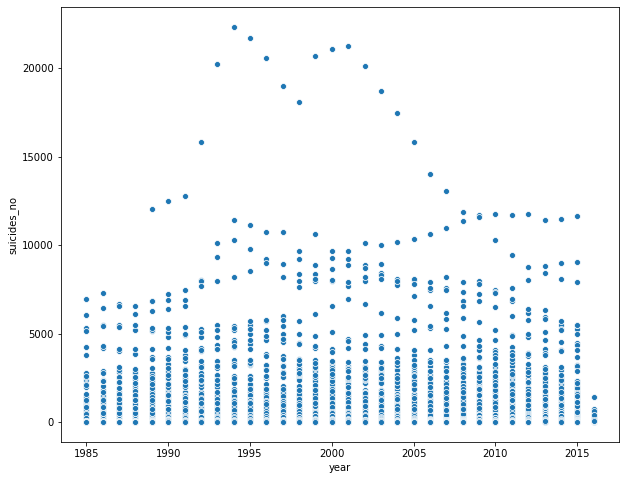

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='year',y='suicides_no',data=df)

These scatter plots are not that imformative as we cant observe any particular trend from the plots.